In [2]:
from tensorflow.keras.datasets import imdb


In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [13]:
"WORD ENCODED AS INTEGER", train_data[0]

('WORD ENCODED AS INTEGER',
 [1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  4

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = { word_index[key]: key for key in word_index }
reverse_word_index[1]

'the'

In [14]:
"WORD DECODED FROM INTEGER", ' '.join([reverse_word_index.get(idx - 3, '?') for idx in train_data[0]])

('WORD DECODED FROM INTEGER',
 "? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for w

In [55]:
import numpy as np

# Does one_hot encoding. 
# NOTE: THIS WILL REMOVE MULTIPLE WORDS. ONLY ONE OCCURENCE IS RECORDED
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [39]:
from tensorflow.keras import models, layers

network = models.Sequential()
# Map 10000 to 16
network.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
# 16 -> 16, pure operations layer
network.add(layers.Dense(16, activation='relu'))
# binary classification problem, outputs probability. 
network.add(layers.Dense(1, activation='sigmoid'))

In [40]:
# CrossEntropy: Distance between our predictions and the actual values

# RMSprop is also available as keras.optimizers.RMSprop if you need to tweak its values. 
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Creating validation set

x_validation = x_train[:10000]
y_validation = y_train[:10000]

x_partial_train = x_train[10000:]
y_partial_train = y_train[10000:]

In [42]:
history = network.fit(
    x_partial_train, 
    y_partial_train, 
    epochs=20, batch_size=512, 
    validation_data=(x_validation, y_validation)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 91us/sample - loss: 0.5351 - accuracy: 0.7711 - val_loss: 0.4060 - val_accuracy: 0.8642
Epoch 2/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.3217 - accuracy: 0.9020 - val_loss: 0.3111 - val_accuracy: 0.8904
Epoch 3/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.2345 - accuracy: 0.9251 - val_loss: 0.2829 - val_accuracy: 0.8897
Epoch 4/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.1832 - accuracy: 0.9409 - val_loss: 0.2776 - val_accuracy: 0.8906
Epoch 5/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.1482 - accuracy: 0.9534 - val_loss: 0.2780 - val_accuracy: 0.8878
Epoch 6/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.1226 - accuracy: 0.9636 - val_loss: 0.2878 - val_accuracy: 0.8882
Epoch 7/20
15000/15000 [==============================] 

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

As we can see below the network overfits really bad

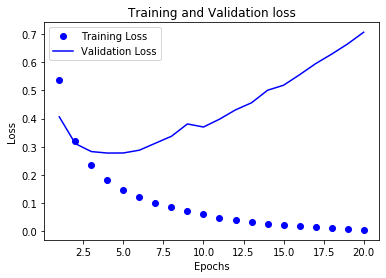

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


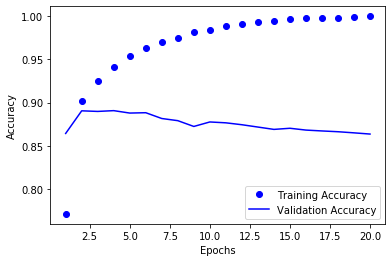

In [45]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_partial_train, y_partial_train, epochs = 4, batch_size=512)


Train on 15000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 61us/sample - loss: 0.5067 - accuracy: 0.7945
Epoch 2/4
15000/15000 [==============================] - 1s 38us/sample - loss: 0.2981 - accuracy: 0.9034
Epoch 3/4
15000/15000 [==============================] - 1s 38us/sample - loss: 0.2202 - accuracy: 0.9273
Epoch 4/4
15000/15000 [==============================] - 1s 36us/sample - loss: 0.1715 - accuracy: 0.9439


In [47]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 92us/sample - loss: 0.3010 - accuracy: 0.8781


[0.30099417234897613, 0.87808]

In [53]:
"WORD DECODED UNORDERED FROM ONEHOT", ' '.join([
    reverse_word_index.get(idx - 3, '?') 
    for idx, el in enumerate(x_test[1]) if el == 1
])

('WORD DECODED UNORDERED FROM ONEHOT',
 "? ? the and a of to is br in it i this that as with movie but film on you his have be one by an so from her it's has if some there what good very up time she even story really see well other because think characters films character many plot off does still man here say scenes work makes find same part lot want young take may interesting script might performance sure set place worth job plays short video small written style definitely unfortunately michael directed viewer brilliant matter strong simple scary robert attention buy atmosphere sexual subject difficult emotional development perfectly powerful create pay considering tension bizarre disturbing mood climax fascinating content apartment wonderfully unusual player psychological regular deals study fits structure focuses murphy burns dennis praise internet patient requires evident response darker builds audio desperation moody convincingly sincere trademark patience loneliness altman stores

In [54]:
"WORD DECODED FROM INTEGER", ' '.join([reverse_word_index.get(idx - 3, '?') for idx in test_data[1]])

('WORD DECODED FROM INTEGER',
 "? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up

In [61]:
model.predict(x_test)[1]

array([0.99892455], dtype=float32)